Importing the Libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [ ]:
# Load the dataset
df = pd.read_csv('data/wine.csv')

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

 Most frequent wine quality

In [ ]:
most_frequent_quality = df['quality'].mode()[0]
print({most_frequent_quality})


{np.int64(5)}


Highest and lowest quality scores

In [ ]:
max_quality = df['quality'].max()
min_quality = df['quality'].min()
print(f"Highest quality: {max_quality}, Lowest quality: {min_quality}")

Highest quality: 8, Lowest quality: 3


Correlation Analysis

Fixed Acidity vs Quality: 0.12405164911322257
Alcohol vs Quality: 0.4761663239995377
Free Sulfur Dioxide vs Quality: -0.05065605724427594


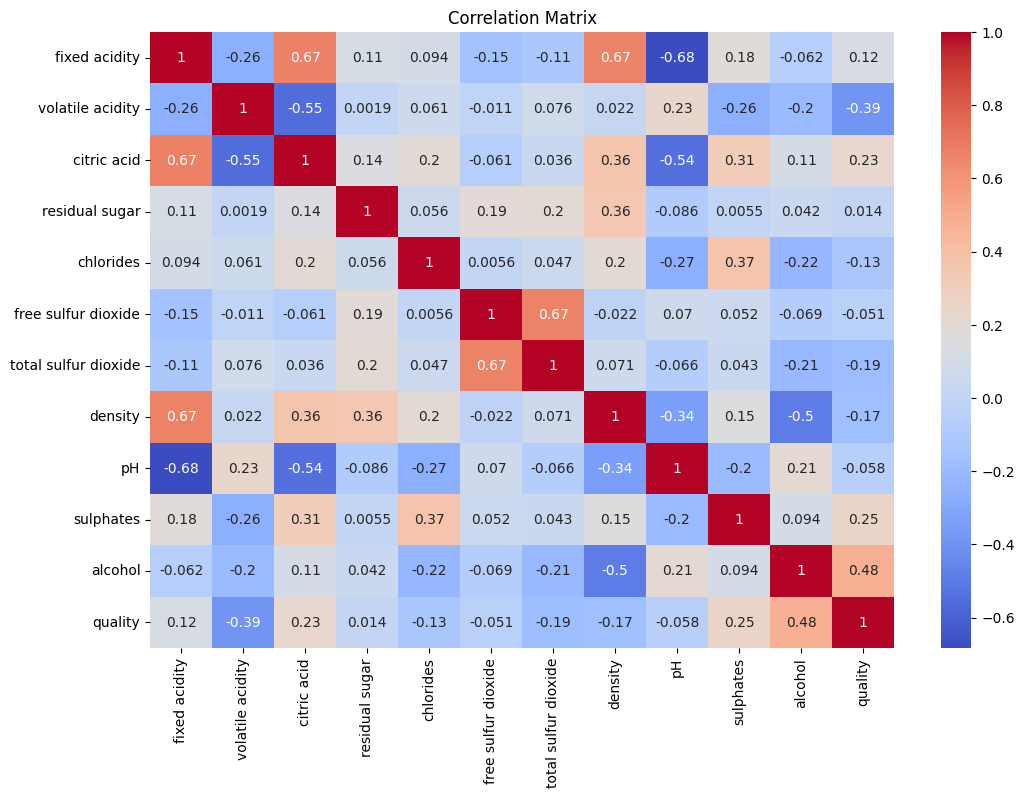

In [ ]:
# Correlation matrix
correlation = df.corr()

# Correlation of fixed acidity, alcohol, and free sulfur dioxide with quality
print("Fixed Acidity vs Quality:", correlation.loc['fixed acidity', 'quality'])
print("Alcohol vs Quality:", correlation.loc['alcohol', 'quality'])
print("Free Sulfur Dioxide vs Quality:", correlation.loc['free sulfur dioxide', 'quality'])

# Heatmap for visualization

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Residual Sugar for Best and Worst Wines

In [ ]:
# Mean residual sugar for best and worst quality wines


best_quality = df[df['quality'] == df['quality'].max()]['residual sugar'].mean()
worst_quality = df[df['quality'] == df['quality'].min()]['residual sugar'].mean()
print(f"Average residual sugar for best quality wine: {best_quality}")
print(f"Average residual sugar for worst quality wine: {worst_quality}")


Average residual sugar for best quality wine: 2.5777777777777775
Average residual sugar for worst quality wine: 2.6350000000000002


Effect of Volatile Acidity

In [ ]:
# Correlation between volatile acidity and quality

va_corr = df['volatile acidity'].corr(df['quality'])
print(f"Volatile Acidity vs Quality Correlation: {va_corr}")


Volatile Acidity vs Quality Correlation: -0.390557780264007


Train Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Features and target

X = df.drop('quality', axis=1)
y = df['quality']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 0.5594


Random Forest Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.6594


TO Compare Accuracy Scores for Decision Tree vs Random Forest

In [ ]:
# Compare the accuracies of both models
print("Model Comparison:")
print(f"Decision Tree Accuracy:  {dt_accuracy:.4f}")
print(f"Random Forest Accuracy:  {rf_accuracy:.4f}")

if rf_accuracy > dt_accuracy:
    print("Random Forest performed better.")
elif rf_accuracy < dt_accuracy:
    print("Decision Tree performed better.")
else:
    print("Both models performed equally well.")


Model Comparison:
Decision Tree Accuracy:  0.5594
Random Forest Accuracy:  0.6594
Random Forest performed better.
